<a href="https://colab.research.google.com/github/Lina-Maatouk/AccidentsWA/blob/main/Clustering_Project_WA_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering Project: Washington State**

## **Libraries and references**


In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
#https://www.reneshbedre.com/blog/dbscan-python.html

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
accident_data = pd.read_csv('/gdrive/My Drive/Data340-EDA-WA/accident2021.csv',encoding_errors='ignore')
accident_data.head()

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001,0,0,2,2,0,3,3,...,13,22,10:00pm-10:59pm,25,25,23,11:00pm-11:59pm,2,2,2
1,1,Alabama,10002,0,0,1,1,0,2,2,...,Unknown,19,7:00pm-7:59pm,9,9,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),2
2,1,Alabama,10003,1,1,1,1,0,1,1,...,29,9,9:00am-9:59am,40,40,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
3,1,Alabama,10004,0,0,1,1,0,1,1,...,20,16,4:00pm-4:59pm,28,28,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
4,1,Alabama,10005,0,0,2,2,0,4,4,...,20,22,10:00pm-10:59pm,30,30,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1


In [5]:
df=accident_data.loc[accident_data['STATENAME']=="Washington"]
df

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
37974,53,Washington,530001,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
37975,53,Washington,530002,1,1,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
37976,53,Washington,530003,0,0,1,1,0,3,3,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
37977,53,Washington,530004,0,0,1,1,0,2,2,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
37978,53,Washington,530005,0,0,2,2,0,4,4,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38572,53,Washington,530636,0,0,2,2,0,2,2,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
38573,53,Washington,530637,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
38574,53,Washington,530638,0,0,1,1,0,1,1,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
38575,53,Washington,530639,0,0,2,2,0,2,2,...,Unknown,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 37974 to 38576
Data columns (total 80 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         603 non-null    int64  
 1   STATENAME     603 non-null    object 
 2   ST_CASE       603 non-null    int64  
 3   PEDS          603 non-null    int64  
 4   PERNOTMVIT    603 non-null    int64  
 5   VE_TOTAL      603 non-null    int64  
 6   VE_FORMS      603 non-null    int64  
 7   PVH_INVL      603 non-null    int64  
 8   PERSONS       603 non-null    int64  
 9   PERMVIT       603 non-null    int64  
 10  COUNTY        603 non-null    int64  
 11  COUNTYNAME    603 non-null    object 
 12  CITY          603 non-null    int64  
 13  CITYNAME      603 non-null    object 
 14  MONTH         603 non-null    int64  
 15  MONTHNAME     603 non-null    object 
 16  DAY           603 non-null    int64  
 17  DAYNAME       603 non-null    int64  
 18  DAY_WEEK      603 non-nu

In [7]:
#Average cases per month
cases_month=pd.pivot_table(df,values='ST_CASE',index='MONTHNAME',aggfunc=pd.Series.nunique)
cases_month


#pd.pivot_table(df, values='col1', index='col2', columns='col3',aggfunc=pd.Series.nunique)

,ST_CASE
MONTHNAME,
April,36
August,72
December,46
February,25
January,38
July,58
June,61
March,41
May,44


**Standardize the Latitude and Longitude data for analysis.**


In [20]:
df['LATITUDE_ZSCORE']=stats.zscore(df['LATITUDE'])
df['LATITUDE_ZSCORE']

<ipython-input-20-e7c4beaa5de5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LATITUDE_ZSCORE']=stats.zscore(df['LATITUDE'])


37974    -0.729915
37975     0.727526
37976     0.599879
37977    -0.798686
37978    -0.430395
           ...    
38572     0.596856
38573     0.701243
38574    21.319372
38575     0.208169
38576    -0.125112
Name: LATITUDE_ZSCORE, Length: 603, dtype: float64

In [21]:
df['LONGITUD_ZSCORE']=stats.zscore(df['LONGITUD'])
df['LONGITUD_ZSCORE']

<ipython-input-21-fdf92609ee58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LONGITUD_ZSCORE']=stats.zscore(df['LONGITUD'])


37974    -0.081942
37975     0.069729
37976    -0.071146
37977    -0.085965
37978     0.072588
           ...    
38572     0.023964
38573     0.039611
38574    24.504865
38575    -0.066891
38576    -0.086028
Name: LONGITUD_ZSCORE, Length: 603, dtype: float64

In [10]:
df.loc[:, 'LATITUDE_ZSCORE'] = stats.zscore(df['LATITUDE'])
df.loc[:, 'LONGITUD_ZSCORE'] = stats.zscore(df['LONGITUD'])

<ipython-input-10-de88040a1d66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'LATITUDE_ZSCORE'] = stats.zscore(df['LATITUDE'])
<ipython-input-10-de88040a1d66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'LONGITUD_ZSCORE'] = stats.zscore(df['LONGITUD'])


In [22]:
#df for creating clustering
df_lat_long = df[['LONGITUD_ZSCORE', 'LATITUDE_ZSCORE']].copy()

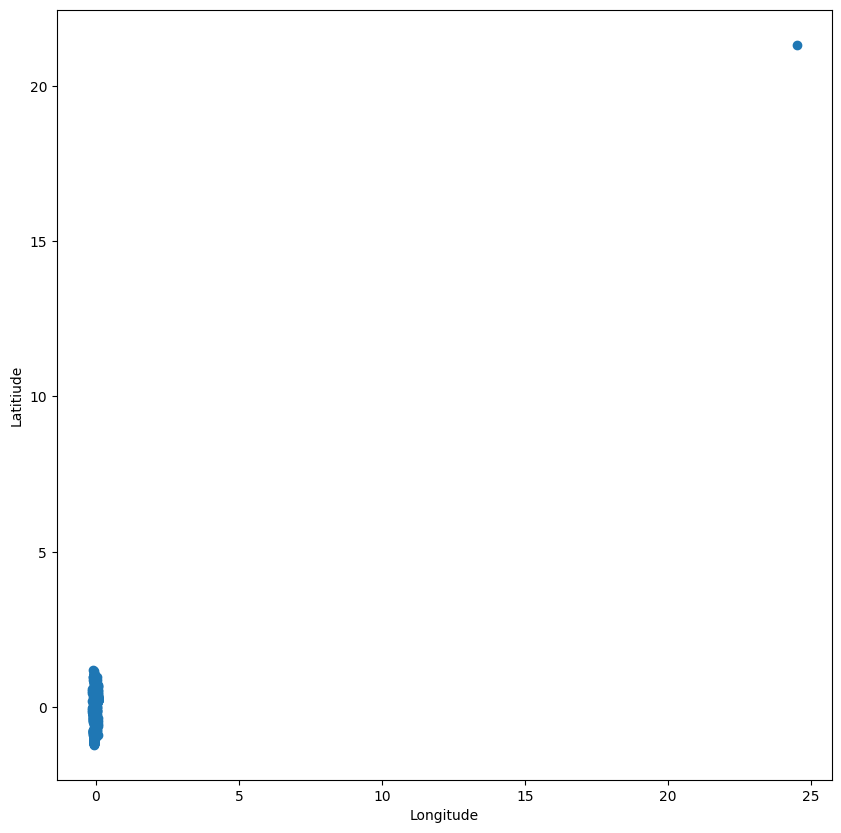

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(df['LONGITUD_ZSCORE'],df['LATITUDE_ZSCORE'])
plt.xlabel('Longitude')
plt.ylabel('Latitiude')
plt.show()

We notice that there is an outlier in the graph. We will then modify our code to get rid off the outlier. Here is our result:

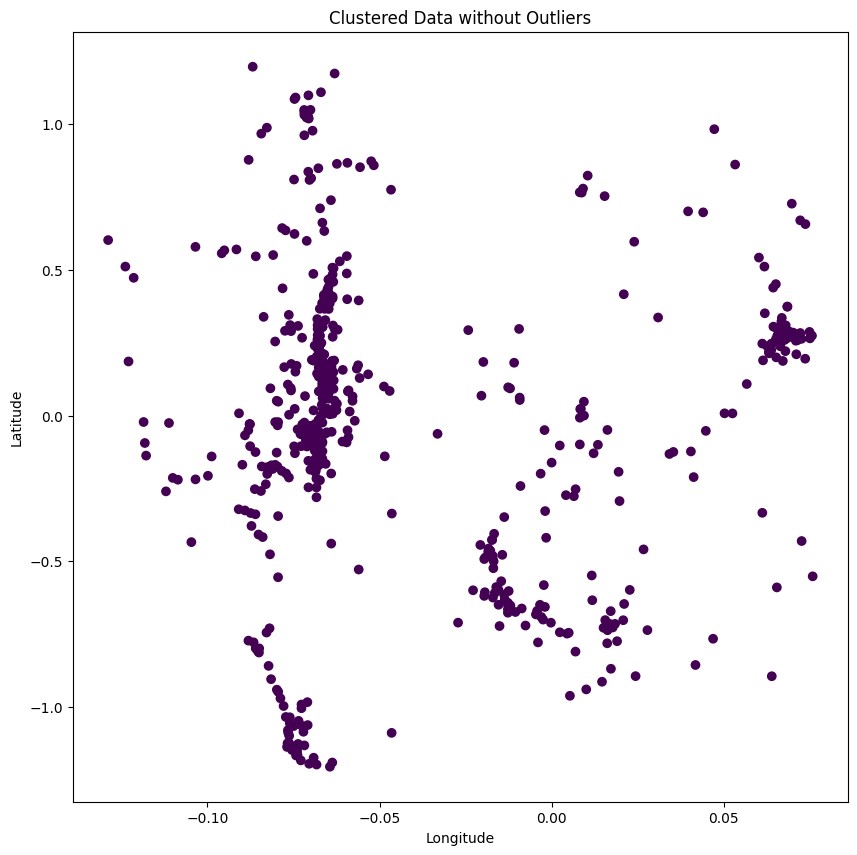

In [24]:
# Apply DBSCAN clustering
clusters = DBSCAN(eps=0.2, min_samples=5).fit(df_lat_long.values)

# Identify and remove outliers
outlier_mask = (clusters.labels_ == -1)  # -1 represents outliers in DBSCAN
df_no_outliers = df_lat_long[~outlier_mask]

# Center the clusters
centered_clusters = DBSCAN(eps=0.2, min_samples=5).fit(df_no_outliers.values)

# Plot the scatter plot with clusters
plt.figure(figsize=(10, 10))
plt.scatter(df_no_outliers['LONGITUD_ZSCORE'], df_no_outliers['LATITUDE_ZSCORE'], c=centered_clusters.labels_, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Data without Outliers')
plt.show()


**Create the Lat and Long Dataframe for use in clustering.**

In [25]:
df_lat_long=df[['LONGITUD_ZSCORE','LATITUDE_ZSCORE']].copy()
df_lat_long

,LONGITUD_ZSCORE,LATITUDE_ZSCORE
37974,-0.081942,-0.729915
37975,0.069729,0.727526
37976,-0.071146,0.599879
37977,-0.085965,-0.798686
37978,0.072588,-0.430395
...,...,...
38572,0.023964,0.596856
38573,0.039611,0.701243
38574,24.504865,21.319372
38575,-0.066891,0.208169


**This section will use K-Nearest Negihbors for help define the parameters in the DBSCAN Clustering alogrithm.  Vary the number of n_neighbors to discover the "elbow" value where the K-nn distance will be used.**

In [26]:
# n_neighbors = 7 as kneighbors function returns distance of point to itself (i.e. first column will be zeros)
nbrs = NearestNeighbors(n_neighbors=7).fit(df_lat_long)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df_lat_long)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

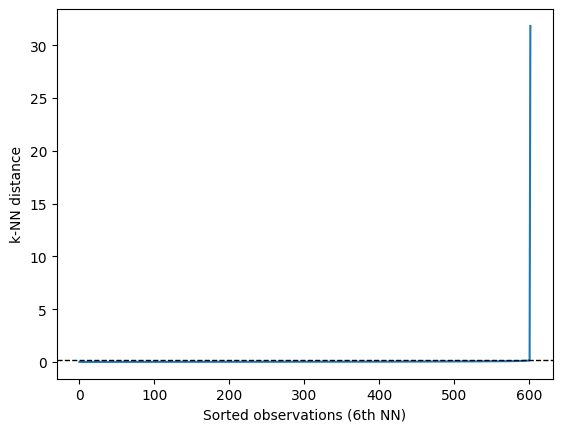

In [27]:
#  for each iteration ensure the distance are set to (n_neighbors-1) k_dist = sort_neigh_dist[:, (n_neighbors-1) ]
k_dist = sort_neigh_dist[:, 6]
plt.plot(k_dist)
plt.axhline(y=0.2, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (6th NN)")
plt.show()

Cluster Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  

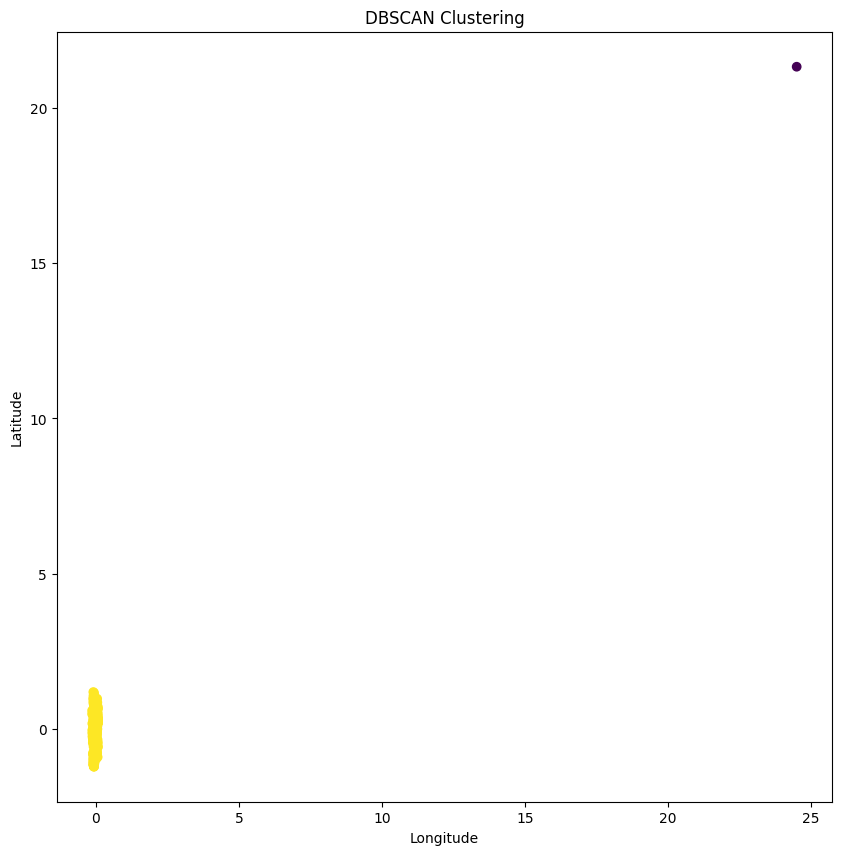

In [33]:
# Apply DBSCAN clustering
clusters = DBSCAN(eps=0.2, min_samples=5).fit(df_lat_long.values)

# Display cluster labels and statistics
print("Cluster Labels:")
print(clusters.labels_)

# Count the occurrences of each cluster label
label_counts = Counter(clusters.labels_)
print("Cluster Label Counts:")
print(label_counts)

# Plot the clustered data
plt.figure(figsize=(10, 10))
plt.scatter(df_lat_long['LONGITUD_ZSCORE'], df_lat_long['LATITUDE_ZSCORE'], c=clusters.labels_, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering')
plt.show()

In [34]:
# Create a DataFrame for clustering
df_lat_long = df[['LONGITUD_ZSCORE', 'LATITUDE_ZSCORE']].copy()

# Define parameter ranges for grid search
eps_values = [0.1, 0.2, 0.3, 0.4]
min_samples_values = [3, 5, 7, 10]

# Perform grid search
best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        clusters = DBSCAN(eps=eps, min_samples=min_samples).fit(df_lat_long.values)
        labels = clusters.labels_

        if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
            silhouette_avg = metrics.silhouette_score(df_lat_long, labels)
            print(f"Eps: {eps}, Min Samples: {min_samples}, Silhouette Score: {silhouette_avg}")

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

# Output the best parameter values
print(f"Best Eps: {best_eps}, Best Min Samples: {best_min_samples}, Best Silhouette Score: {best_silhouette_score}")

Eps: 0.1, Min Samples: 3, Silhouette Score: 0.9620558540378399
Eps: 0.1, Min Samples: 5, Silhouette Score: 0.9620558540378399
Eps: 0.1, Min Samples: 7, Silhouette Score: 0.9620558540378399
Eps: 0.1, Min Samples: 10, Silhouette Score: 0.892426235590948
Eps: 0.2, Min Samples: 3, Silhouette Score: 0.9811944560665724
Eps: 0.2, Min Samples: 5, Silhouette Score: 0.9811944560665724
Eps: 0.2, Min Samples: 7, Silhouette Score: 0.9811944560665724
Eps: 0.2, Min Samples: 10, Silhouette Score: 0.9811944560665724
Eps: 0.3, Min Samples: 3, Silhouette Score: 0.9811944560665724
Eps: 0.3, Min Samples: 5, Silhouette Score: 0.9811944560665724
Eps: 0.3, Min Samples: 7, Silhouette Score: 0.9811944560665724
Eps: 0.3, Min Samples: 10, Silhouette Score: 0.9811944560665724
Eps: 0.4, Min Samples: 3, Silhouette Score: 0.9811944560665724
Eps: 0.4, Min Samples: 5, Silhouette Score: 0.9811944560665724
Eps: 0.4, Min Samples: 7, Silhouette Score: 0.9811944560665724
Eps: 0.4, Min Samples: 10, Silhouette Score: 0.981194

Cluster Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  

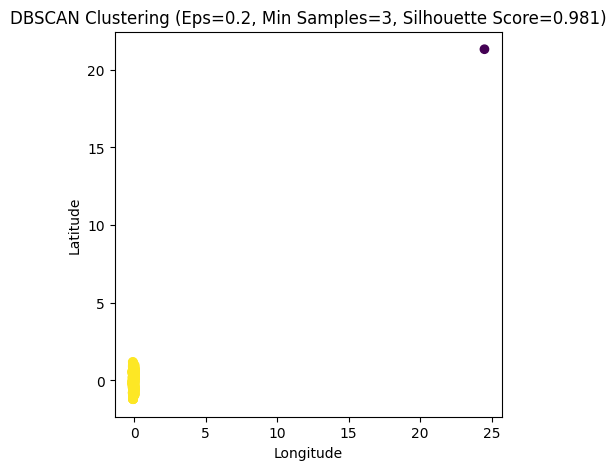

In [42]:
# Apply DBSCAN clustering with the best parameters
best_eps = 0.2
best_min_samples = 3
clusters = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(df_lat_long.values)

# Display cluster labels and statistics
print("Cluster Labels:")
print(clusters.labels_)

# Count the occurrences of each cluster label
label_counts = Counter(clusters.labels_)
print("Cluster Label Counts:")
print(label_counts)

# Plot the clustered data
plt.figure(figsize=(5, 5))
plt.scatter(df_lat_long['LONGITUD_ZSCORE'], df_lat_long['LATITUDE_ZSCORE'], c=clusters.labels_, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'DBSCAN Clustering (Eps={best_eps}, Min Samples={best_min_samples}, Silhouette Score={best_silhouette_score:.3f})')
plt.show()

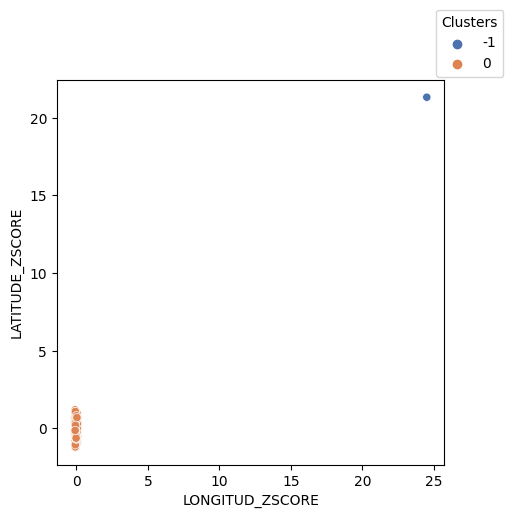

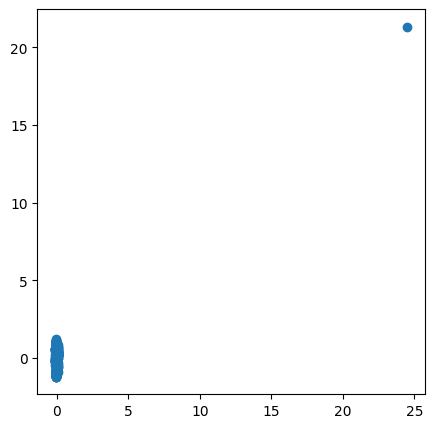

In [39]:
plt.figure(figsize=(5,5))
p =sns.scatterplot(data=df_lat_long, x="LONGITUD_ZSCORE", y="LATITUDE_ZSCORE", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')

plt.show()
plt.figure(figsize=(5,5))
plt.scatter(df['LONGITUD_ZSCORE'],df['LATITUDE_ZSCORE'])

Extra Credit:

<ipython-input-43-ab43f32dc71c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data = silhouette_scores_data.append(
<ipython-input-43-ab43f32dc71c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data = silhouette_scores_data.append(
<ipython-input-43-ab43f32dc71c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data = silhouette_scores_data.append(
<ipython-input-43-ab43f32dc71c>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  silhouette_scores_data = silhouette_scores_data.append(
<ipython-input-43-ab43f32dc71c>:31: FutureWarning: The frame.append method is deprecated and

Best Hyperparameters:
      score            parameters
0  0.333368  eps:0.2 min_sample:3


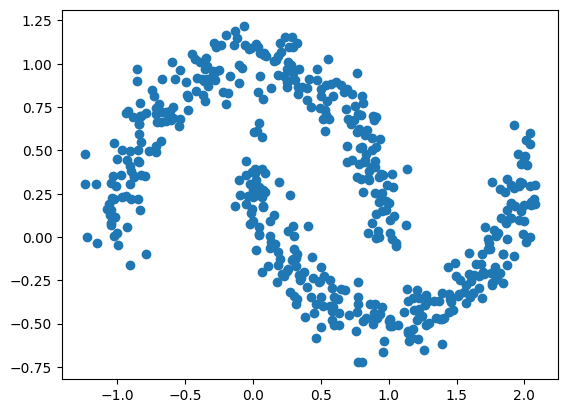

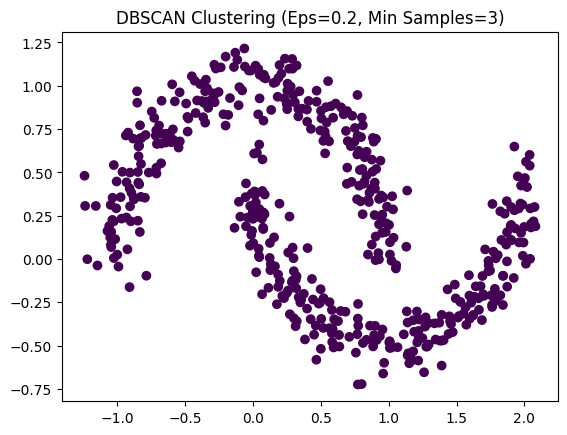

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Create Sample data
X, y = make_moons(n_samples=500, shuffle=True, noise=0.1, random_state=20)
plt.scatter(x=X[:, 0], y=X[:, 1])

# Finding best values of eps and min_samples
eps_list = np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_list = np.arange(start=2, stop=5, step=1)

# Creating empty data frame to store the silhouette scores for each trial
silhouette_scores_data = pd.DataFrame()

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        # Generating DBSCAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)

        if len(np.unique(db.fit_predict(X))) > 1:
            sil_score = silhouette_score(X, db.fit_predict(X))
        else:
            continue

        trial_parameters = "eps:" + str(eps_trial.round(1)) + " min_sample:" + str(min_sample_trial)

        silhouette_scores_data = silhouette_scores_data.append(
            pd.DataFrame(data=[[sil_score, trial_parameters]], columns=["score", "parameters"])
        )

# Finding out the best hyperparameters with the highest Score
best_parameters = silhouette_scores_data.sort_values(by='score', ascending=False).head(1)
print("Best Hyperparameters:")
print(best_parameters)

# DBSCAN Clustering with the best hyperparameters
best_eps = best_parameters.iloc[0]['parameters'].split(' ')[0][4:]
best_min_samples = best_parameters.iloc[0]['parameters'].split(' ')[1][11:]
db_best = DBSCAN(eps=float(best_eps), min_samples=int(best_min_samples))

# Plot for the clusters
plt.figure()
plt.scatter(x=X[:, 0], y=X[:, 1], c=db_best.fit_predict(X), cmap='viridis')
plt.title(f'DBSCAN Clustering (Eps={best_eps}, Min Samples={best_min_samples})')
plt.show()
